In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [234]:
airbnb_data = pd.read_csv('AirBNB/AB_NYC_2019.csv')
airbnb_data.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22028,17719353,Private Queen room&bathroom in NEW Luxury Buil...,89197711,Albert,Brooklyn,Gravesend,40.60044,-73.99341,Private room,79,1,2,2017-05-28,0.08,1,0
17459,13750448,Gloriously Sunny Brooklyn Pad!,6816955,Callie And Sean,Brooklyn,Bedford-Stuyvesant,40.68920,-73.95457,Private room,53,2,121,2019-06-16,3.30,1,348
30014,23106431,Bright Room with Qsize bed 20min to dt Manhattan,55468128,Reina,Brooklyn,Bedford-Stuyvesant,40.68960,-73.95653,Private room,62,1,27,2019-06-25,1.69,7,248
33210,26211176,Shared room in East Williamsburg near the park,178543960,Sergii,Brooklyn,Greenpoint,40.72157,-73.94002,Shared room,35,30,1,2018-08-10,0.09,10,364
6311,4612401,Bushwick Pad,21906247,Sam,Brooklyn,Bedford-Stuyvesant,40.69295,-73.93537,Private room,70,1,0,NaN,NaN,1,0


In [3]:
#find the number of nulls for each feature
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

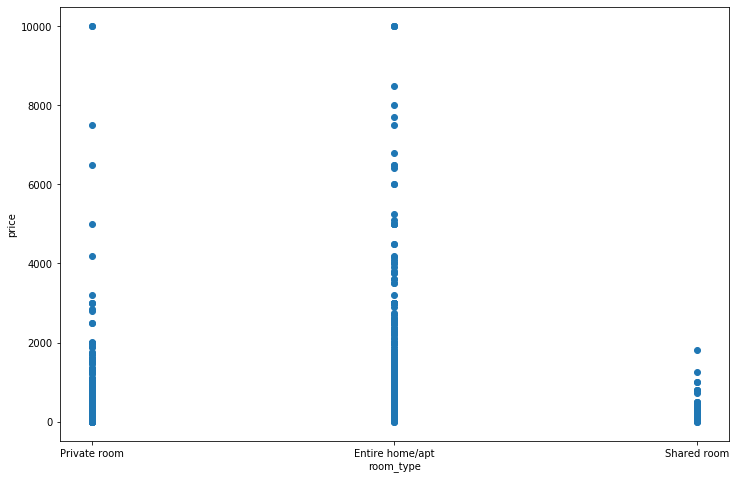

In [4]:
#Plotting features to see which appear correlated to price
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(airbnb_data['room_type'], airbnb_data['price'])
plt.xlabel('room_type')
plt.ylabel('price')
plt.show()

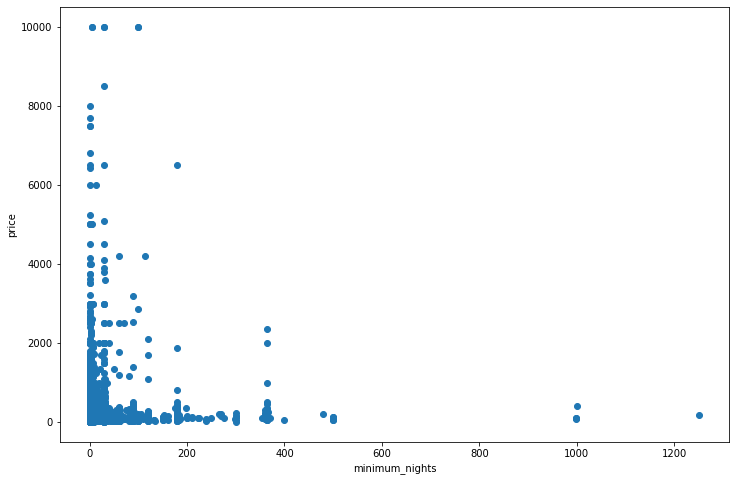

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(airbnb_data['minimum_nights'], airbnb_data['price'])
plt.xlabel('minimum_nights')
plt.ylabel('price')
plt.show()

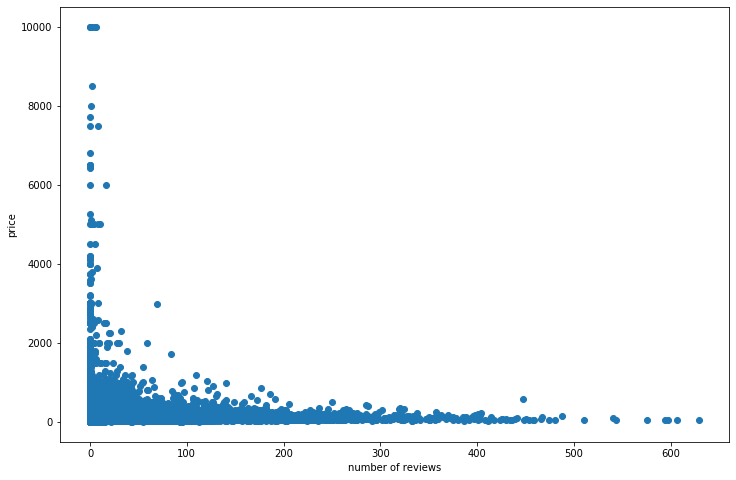

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(airbnb_data['number_of_reviews'], airbnb_data['price'])
plt.xlabel('number of reviews')
plt.ylabel('price')
plt.show()

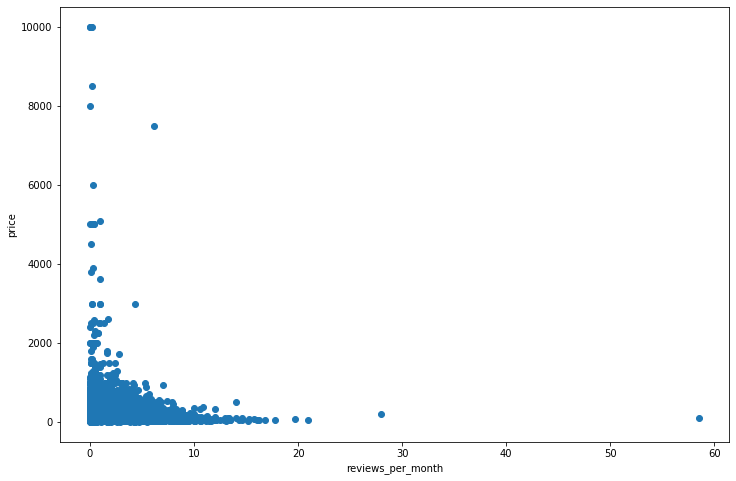

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(airbnb_data['reviews_per_month'], airbnb_data['price'])
plt.xlabel('reviews_per_month')
plt.ylabel('price')
plt.show()

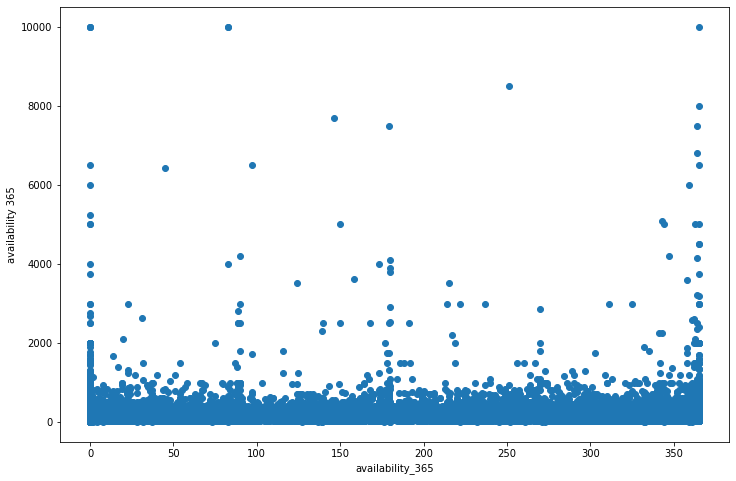

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(airbnb_data['availability_365'], airbnb_data['price'])
plt.xlabel('availability_365')
plt.ylabel('availability 365')
plt.show()

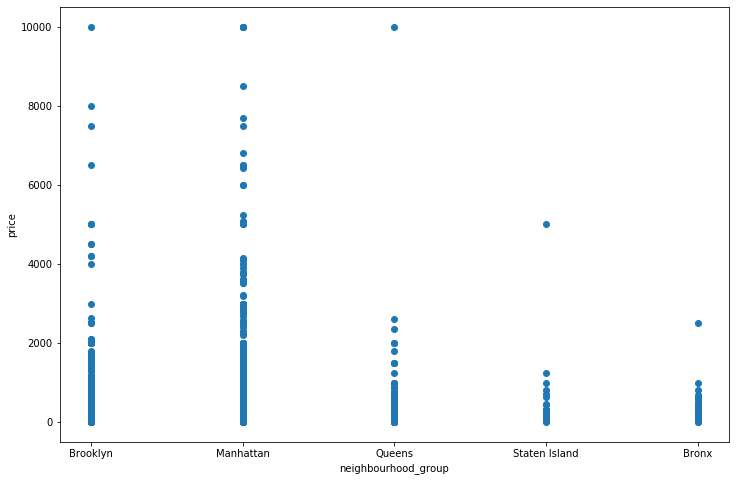

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(airbnb_data['neighbourhood_group'], airbnb_data['price'])
plt.xlabel('neighbourhood_group')
plt.ylabel('price')
plt.show()

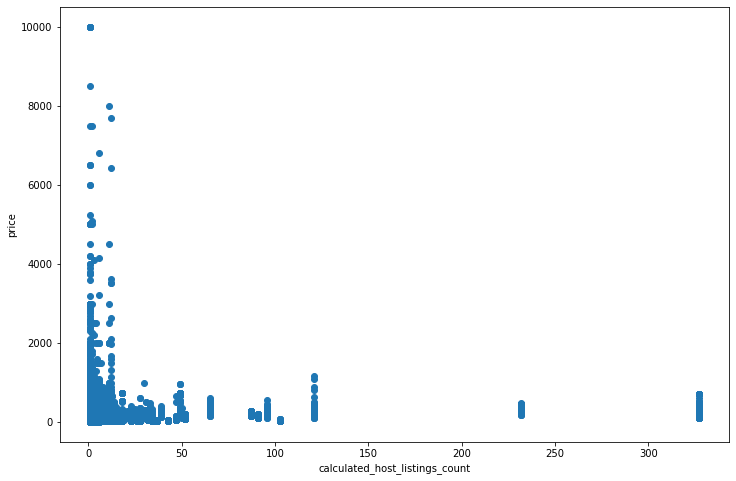

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(airbnb_data['calculated_host_listings_count'], airbnb_data['price'])
plt.xlabel('calculated_host_listings_count')
plt.ylabel('price')
plt.show()

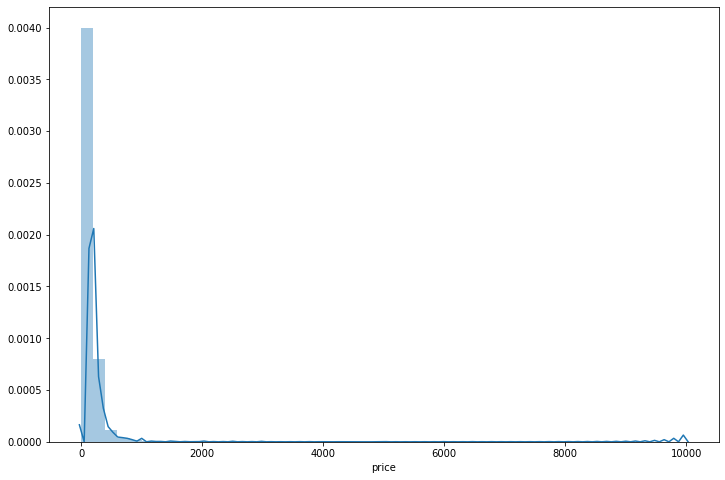

In [91]:
#Histogram features to see if there are obvious outliers or skew
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(airbnb_data['price'])


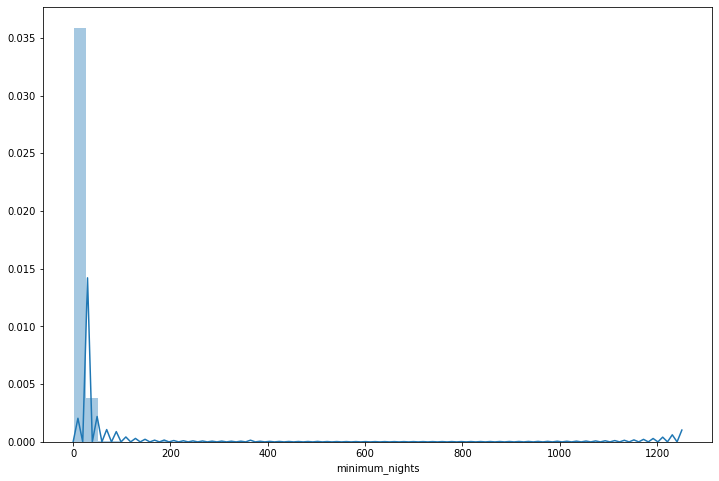

In [92]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(airbnb_data['minimum_nights'])


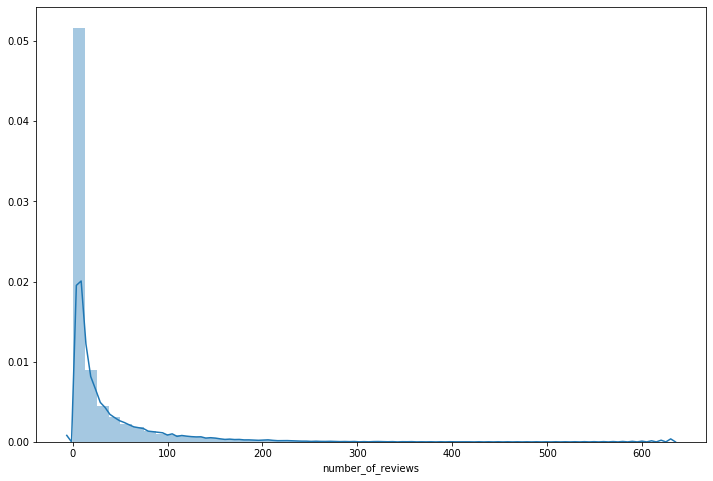

In [93]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(airbnb_data['number_of_reviews'])


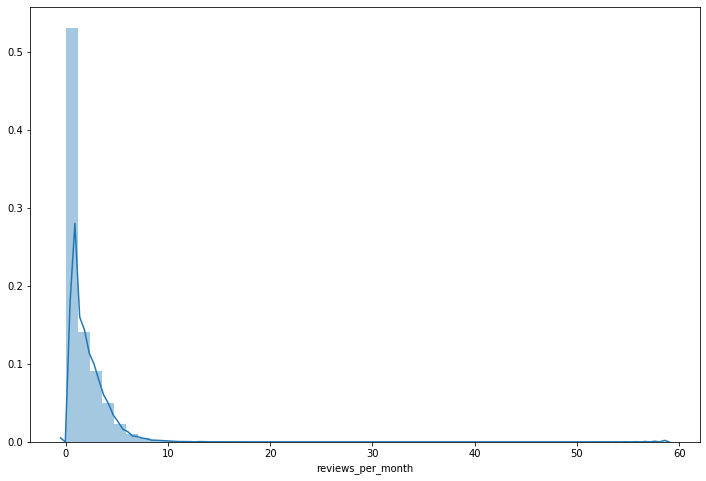

In [94]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(airbnb_data['reviews_per_month'])


In [205]:
# find outliers, show what is 3 standard deviations above/below, and show the 95% percentile
# so we can explore dropping or winsorizing the outliers to improve the model

features = ["price", "number_of_reviews", "minimum_nights", "reviews_per_month", "availability_365"]

for feature in features:
    mean = airbnb_data[feature].mean()
    print(feature, ' mean = ', mean)
    std = airbnb_data[feature].std()
    print('std = ', std)
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    # identify outliers
    outliers = [x for x in airbnb_data[feature] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    outliers_removed = [x for x in airbnb_data[feature] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    print('Lower = ', lower, 'Upper = ', upper)
    print ('max ', feature, ' = ', airbnb_data[feature].max())
    print ('95th Percentile = ', airbnb_data[feature].quantile(0.95))
    print ('min ', feature, ' = ', airbnb_data[feature].min(), '\n')



price  mean =  152.7206871868289
std =  240.15416974718727
Identified outliers: 388
Non-outlier observations: 48507
Lower =  -567.7418220547329 Upper =  873.1831964283906
max  price  =  10000
95th Percentile =  355.0
min  price  =  0 

number_of_reviews  mean =  23.274465691788528
std =  44.55058226668788
Identified outliers: 1221
Non-outlier observations: 47674
Lower =  -110.37728110827513 Upper =  156.92621249185217
max  number_of_reviews  =  629
95th Percentile =  114.0
min  number_of_reviews  =  0 

minimum_nights  mean =  7.029962163820431
std =  20.510549533180445
Identified outliers: 327
Non-outlier observations: 48568
Lower =  -54.501686435720906 Upper =  68.56161076336177
max  minimum_nights  =  1250
95th Percentile =  30.0
min  minimum_nights  =  1 

reviews_per_month  mean =  1.3732214298586884
std =  1.6804419952744627
Identified outliers: 608
Non-outlier observations: 38235
Lower =  -3.6681045559646996 Upper =  6.414547415682076
max  reviews_per_month  =  58.5
95th Percent

In [235]:
#clean data
#drop irrelevant columns
airbnb_data = airbnb_data.drop(columns=['name', 'id', 'host_id', 'host_name', 'last_review'])

#drop prices > 873
airbnb_data = airbnb_data[airbnb_data['price'] < 873]

#one hot encoding for neighbourhood, neighbourhood_group, room_type
airbnb_data = pd.get_dummies(airbnb_data, columns=['neighbourhood'])
airbnb_data = pd.get_dummies(airbnb_data, columns=['neighbourhood_group'])
airbnb_data = pd.get_dummies(airbnb_data, columns=['room_type'])

#drop redundant columns to prevent colinearity errors
airbnb_data = airbnb_data.drop(columns=['neighbourhood_Allerton', 'neighbourhood_group_Queens', 'room_type_Shared room'])

#winsorize columns with outliers
airbnb_data['minimum_nights'] = airbnb_data['minimum_nights'].clip(upper=30)                                                        

#scale all but price
min_max_scaler = MinMaxScaler()
airbnb_data[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count', 'longitude', 'latitude']] \
 = min_max_scaler.fit_transform(airbnb_data[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count', 'longitude', 'latitude']].values)

#set missing reviews_per_month to mean value
mean = airbnb_data['reviews_per_month'].mean()
airbnb_data ['reviews_per_month'].fillna(mean, inplace=True)

airbnb_data.to_csv('AirBNB/Cleaned_ABNB_NYC.csv')
airbnb_data.sample(5)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Arden Heights,neighbourhood_Arrochar,...,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room
42213,0.445157,0.585326,99,0.034483,0.012719,0.034536,0.000000,0.000000,0,0,...,0,0,0,0,0,1,0,0,1,0
48713,0.389576,0.531792,40,0.000000,0.000000,0.023349,0.015337,0.613699,0,0,...,0,0,0,0,0,1,0,0,0,0
8359,0.642340,0.477692,272,0.000000,0.060413,0.015045,0.000000,0.986301,0,0,...,0,0,0,0,0,0,1,0,1,0
15817,0.543809,0.544060,195,0.206897,0.000000,0.023349,0.000000,0.000000,0,0,...,0,0,0,0,0,1,0,0,1,0
20275,0.327195,0.510773,80,0.000000,0.001590,0.000342,0.000000,0.000000,0,0,...,0,0,0,0,0,1,0,0,0,1


In [226]:
#Grid Search for optimal Ridge regression hyper parameters
X = airbnb_data.drop(['price'], axis=1)
Y = airbnb_data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = Ridge()
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
normalizes= ([True,False])

grid_search_Ridge = GridSearchCV(estimator=linear_model,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=5,
                         n_jobs=-1)

grid_search_Ridge.fit(x_train, y_train)
best_parameters_Ridge = grid_search_Ridge.best_params_  
best_score_Ridge = grid_search_Ridge.best_score_ 
print(best_parameters_Ridge)
print(best_score_Ridge)

{'alpha': 1.0, 'normalize': False}
-7049.751641229466


In [222]:
X = airbnb_data.drop(['price'], axis=1)
Y = airbnb_data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = Ridge(alpha=1, 
                     normalize=False)

linear_model.fit(x_train, y_train)
print("Training R2: ", linear_model.score(x_train, y_train))
y_pred = linear_model.predict(x_test)

print("R2 Test: ", r2_score(y_test, y_pred))
print('MSE: %f'% mean_squared_error(y_test, y_pred))

predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print()
print (coef)

Training R2:  0.4078713852705451
R2 Test:  0.3862531280908691
MSE: 7153.501387

longitude                           -223.414186
number_of_reviews                   -127.539555
neighbourhood_group_Staten Island   -116.929624
neighbourhood_Grant City             -70.188909
neighbourhood_Fort Hamilton          -58.072225
                                        ...    
neighbourhood_Breezy Point            97.321480
neighbourhood_Riverdale              105.152493
room_type_Entire home/apt            115.892759
neighbourhood_Woodrow                263.300862
neighbourhood_Fort Wadsworth         316.404805
Length: 233, dtype: float64


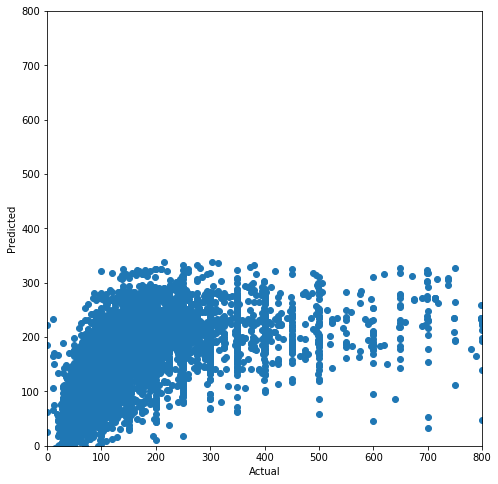

In [223]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.axis('equal')
plt.xlim(0,800)
plt.ylim(0,800)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [227]:
#Grid Search for optimal decision tree parameters
parameters = {'max_depth': [1, 2, 3, 4, 5,7, 8]}
grid_search = GridSearchCV(DecisionTreeRegressor(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)
grid_search.best_params_


{'max_depth': 8}

In [228]:
linear_model = DecisionTreeRegressor(max_depth=8)
linear_model.fit(x_train, y_train)
print("Training R2: ", linear_model.score(x_train, y_train))
y_pred = linear_model.predict(x_test)

print("R2 Test: ", r2_score(y_test, y_pred))
print('MSE: %f'% mean_squared_error(y_test, y_pred))

Training R2:  0.49055407044952803
R2 Test:  0.4252349619858331
MSE: 6414.354360


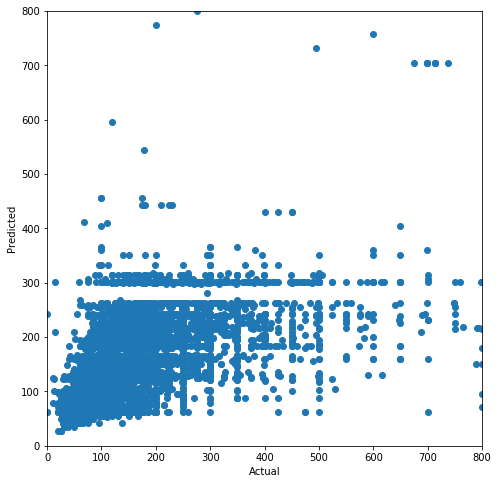

In [229]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.axis('equal')
plt.xlim(0,800)
plt.ylim(0,800)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()